# Подготовка к работе

In [ ]:
# импорт всех необходимых библиотек для работы с моделью
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.models import load_model
from google.colab import files
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from google.colab import drive
from keras.preprocessing import image
import numpy as np

In [ ]:
# загрузка тренировчного и тестовго датасетов
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
# x_train.shape
# x_test.shape

170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
# преобразование массивов меток в одномерные массивы
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

# нормализация данных
x_train = x_train / 255
x_test = x_test / 255
# x_train

In [ ]:
# список названий классов датасета
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
# подключение Google Диска
from google.colab import drive
drive.mount('/content/drive')

!ls "drive/My Drive/Учебная практика"

Mounted at /content/drive
cnn1_model.h5  cnn2_model.h5  cnn3_model.h5  images  temp_images


# Анализ датасета

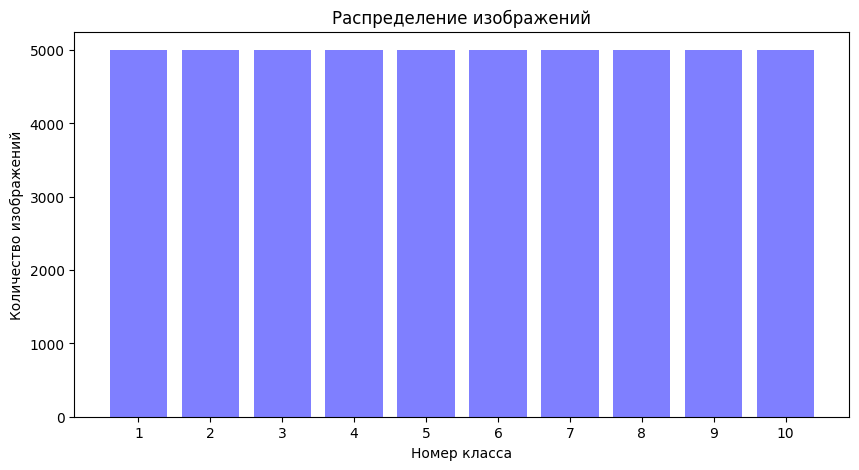

In [ ]:
# количество изображений в каждом классе
class_indices = np.arange(1, 11)
train_class_counts = [np.sum(y_train == i) for i in range(10)]
test_class_counts = [np.sum(y_test == i) for i in range(10)]

# создание графика
plt.figure(figsize=(10, 5))
plt.bar(class_indices, train_class_counts, color='blue', alpha=0.5)
plt.xlabel('Номер класса')
plt.ylabel('Количество изображений')
plt.title('Распределение изображений')
plt.xticks(class_indices)
plt.show()

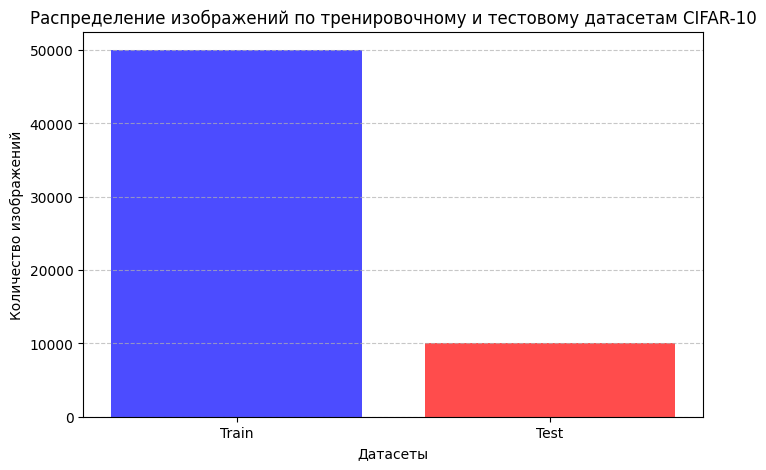

In [ ]:
# подсчет общего количества изображений в каждом датасете
total_train_images = len(y_train)
total_test_images = len(y_test)

# создание графика
plt.figure(figsize=(8, 5))
plt.bar(['Train', 'Test'], [total_train_images, total_test_images], color=['blue', 'red'], alpha=0.7)
plt.xlabel('Датасеты')
plt.ylabel('Количество изображений')
plt.title('Распределение изображений по тренировочному и тестовому датасетам CIFAR-10')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Необходимые функции

In [ ]:
# функция для отображения примера изображения и его метки.
def plot_sample(x, y, index):
  plt.figure(figsize=(15, 2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

In [ ]:
# функция для преобразования изображения в numpyмассив
def load_single_image(image_path, target_size=(32, 32)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [ ]:
# функция для преобразрвания всех изображения из файла в numpy массив
def load_images_from_folder(folder_path, target_size=(32, 32)):
    images = []
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = load_img(img_path, target_size=target_size)
        img_array = img_to_array(img) / 255.0
        images.append(np.expand_dims(img_array, axis=0))
    return images

In [ ]:
# функция для предсказывания объектов на нескольких изображениях и их отображения
def predict_many_objects(model, classes, images):
    for img_array in images:
        # предсказание класса объекта
        prediction = model.predict(img_array)
        predicted_class = classes[np.argmax(prediction)]

        # отображение изображения и предсказанного класса
        plt.imshow(img_array.squeeze())  # убираем лишнюю размерность перед выводом
        plt.xlabel(predicted_class)
        plt.show()

In [ ]:
# функция для предскзывания объекта на одном изображении
def predict_object(model, classes, images):
    for img_array in images:
        img_array = np.expand_dims(img_array, axis=0)
        # Предсказание класса объекта
        prediction = model.predict(img_array)
        predicted_class = classes[np.argmax(prediction)]
        print(predicted_class)
        return predicted_class

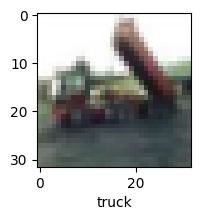

In [ ]:
# пример работы одной из функций
plot_sample(x_train, y_train, 2)

# Подготовка и обучение модели
В ходе работы было рассмотрено три модели сверточной нейронной сети для классификации изображений.

In [ ]:
# модель 1
cnn1 = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3),  activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # cnn
    layers.Conv2D(filters=64, kernel_size=(3,3),  activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# компиляция модели
cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# обучение модели на 10 эпохах
cnn1.fit(x_train, y_train, epochs=10)

print(f'\nevaluate: \n{cnn1.evaluate(x_test, y_test)}')

# загрузка модели на Google Диск
cnn1.save('/content/drive/MyDrive/Учебная практика/cnn1_model.h5')

In [ ]:
# модель 2
cnn2 = models.Sequential([
    # cnn
    layers.Conv2D(filters=32, kernel_size=(3,3),  activation='relu', input_shape=(32, 32, 3)),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),

    # cnn
    layers.Conv2D(filters=64, kernel_size=(3,3),  activation='relu'),
    layers.Dropout(0.25),
    layers.MaxPooling2D((2, 2)),

    # dense
    layers.Flatten(),
    layers.Dropout(0.25),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])

# компиляция модели
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# обучение модели на 20 эпохах
cnn2.fit(x_train, y_train, epochs=20)

print(f'\nevaluate: \n{cnn2.evaluate(x_test, y_test)}')

# загрузка модели на Google Диск
cnn2.save('/content/drive/MyDrive/Учебная практика/cnn2_model.h5')

In [ ]:
# модель 3
cnn3 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.2),

    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),

    layers.Dense(10, activation='softmax')
])

# компиляция модели
cnn3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# обучение модели на 10 эпохах
cnn3.fit(x_train, y_train, epochs=10)

print(f'\nevaluate: \n{cnn3.evaluate(x_test, y_test)}')

# загрузка модели на Google Диск
cnn3.save('/content/drive/MyDrive/Учебная практика/cnn3_model.h5')

Epoch 1/10
1563/1563 [==============================] - 24s 11ms/step - loss: 1.4479 - accuracy: 0.4743
Epoch 2/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0420 - accuracy: 0.6326
Epoch 3/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.8559 - accuracy: 0.7004
Epoch 4/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.7421 - accuracy: 0.7412
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6630 - accuracy: 0.7679
Epoch 6/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.5871 - accuracy: 0.7937
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5273 - accuracy: 0.8138
Epoch 8/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4704 - accuracy: 0.8361
Epoch 9/10
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4245 - accuracy: 0.8499
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


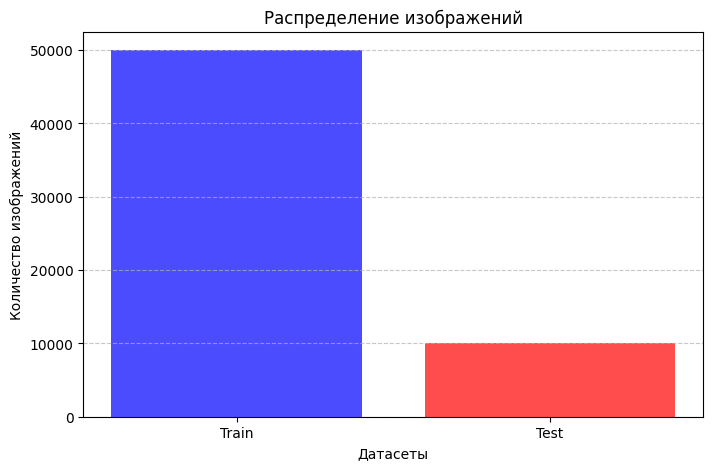

In [ ]:
# данные для графика
datasets = ['Train', 'Test']
counts = [total_train_images, total_test_images]

# создание графика
plt.figure(figsize=(8, 5))
plt.bar(datasets, counts, color=['blue', 'red'], alpha=0.7)
plt.xlabel('Датасеты')
plt.ylabel('Количество изображений')
plt.title('Распределение изображений')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Тестирование модели

In [ ]:
y_pred = cnn3.predict(x_test)  # вероянтности классов для всех тестовых данных
y_classes = [np.argmax(element) for element in y_pred]  # предсказание объекта по максимальной вероятности для всех тестовых данных

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(f'Фактические объекты: {list(y_test[:20])}')  # фактические метки классов
print(f'Предсказанные объекты: {y_classes[:20]}')  # предсказанные метки классов

Фактические объекты: [3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6]
Предсказанные объекты: [3, 8, 1, 8, 6, 6, 3, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 3, 8, 6]


Prediction: ship


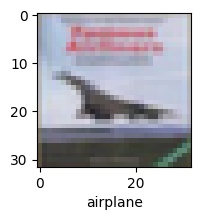

In [ ]:
i = 3
plot_sample(x_test, y_test, i)  # фактический объект
print(f'Prediction: {classes[y_classes[i]]}')   # предсказание объекта

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80      1000
           1       0.88      0.88      0.88      1000
           2       0.74      0.61      0.67      1000
           3       0.52      0.69      0.59      1000
           4       0.76      0.71      0.74      1000
           5       0.66      0.66      0.66      1000
           6       0.78      0.86      0.82      1000
           7       0.86      0.79      0.82      1000
           8       0.90      0.83      0.86      1000
           9       0.88      0.83      0.85      1000

    accuracy                           0.77     10000
   macro avg       0.78      0.77      0.77     10000
weighted avg       0.78      0.77      0.77     10000



# Загрузка модели из Google Drive

In [ ]:
# загрузка модели из Googl Диска
load_model_cnn3 = load_model('/content/drive/MyDrive/Учебная практика/cnn3_model.h5')

In [ ]:
# проверяем содержимое директории на Google Диске
dir_path = '/content/drive/MyDrive/Учебная практика/'
print('cnn3_model.h5' in os.listdir(dir_path))

True


1/1 [==============================] - 2s 2s/step


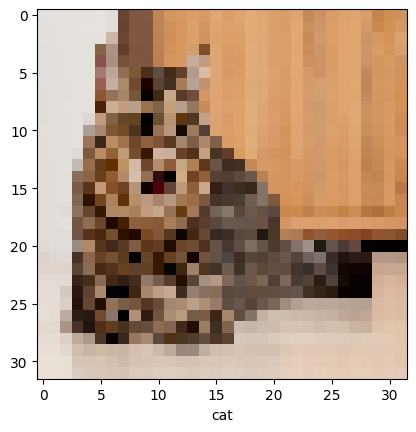

1/1 [==============================] - 0s 18ms/step


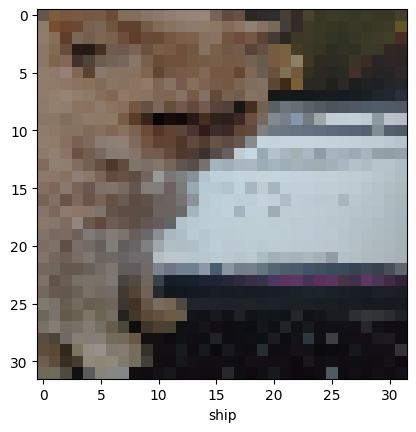

1/1 [==============================] - 0s 18ms/step


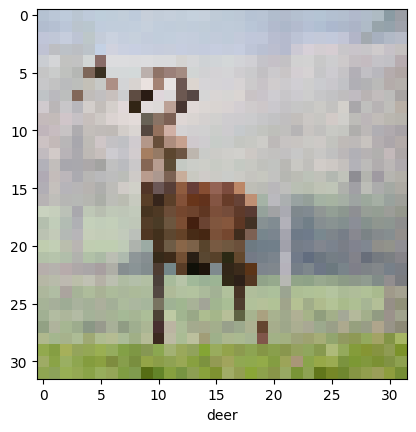

1/1 [==============================] - 0s 18ms/step


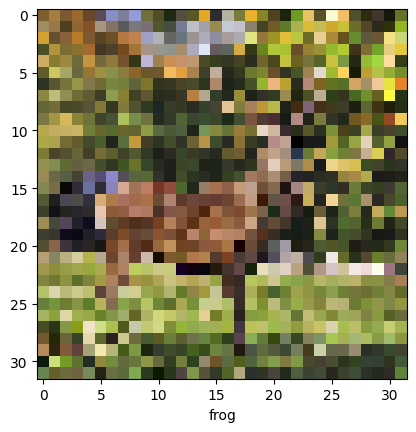

1/1 [==============================] - 0s 17ms/step


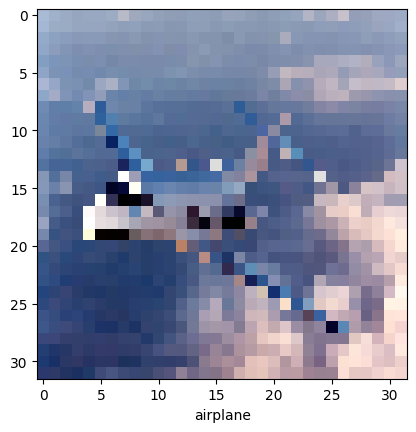

1/1 [==============================] - 0s 18ms/step


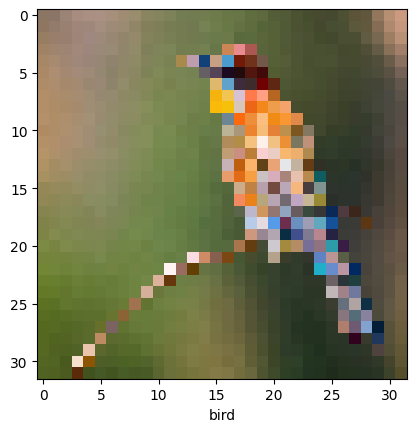

1/1 [==============================] - 0s 17ms/step


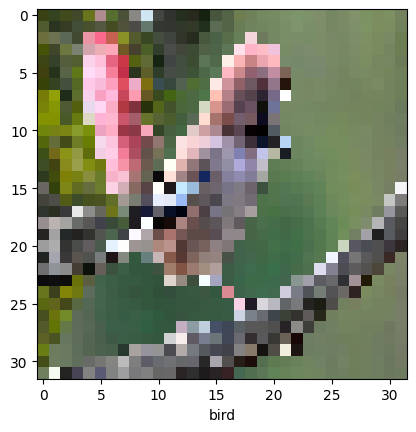

1/1 [==============================] - 0s 18ms/step


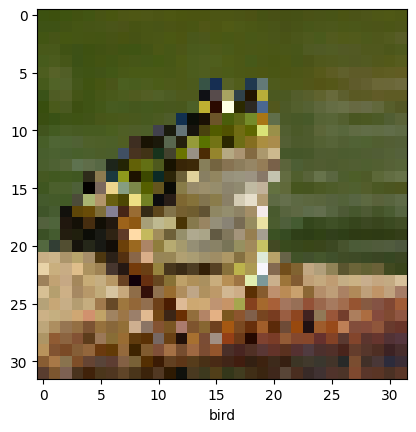

1/1 [==============================] - 0s 18ms/step


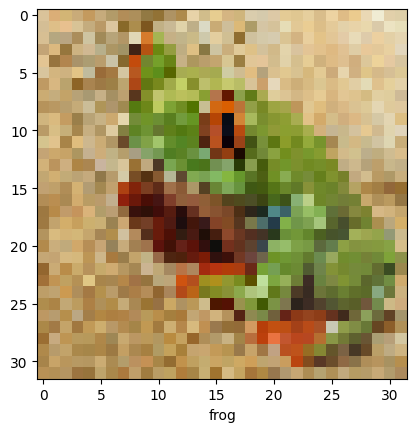

1/1 [==============================] - 0s 18ms/step


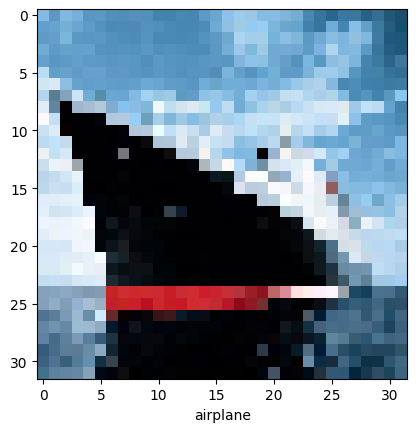

1/1 [==============================] - 0s 18ms/step


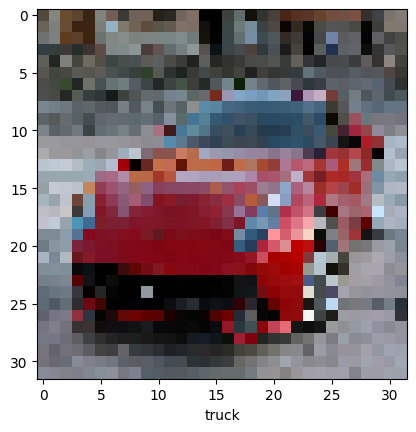

1/1 [==============================] - 0s 19ms/step


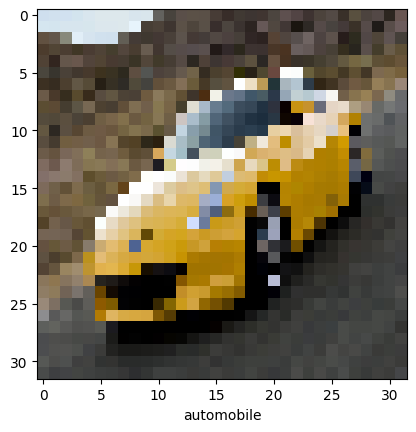

1/1 [==============================] - 0s 18ms/step


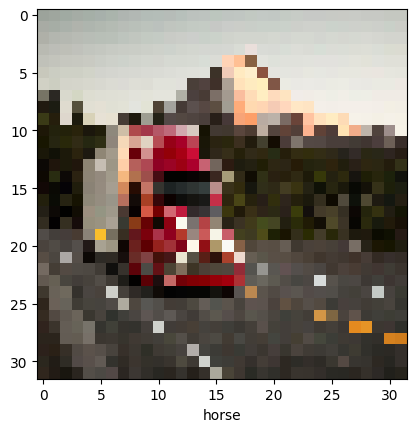

1/1 [==============================] - 0s 17ms/step


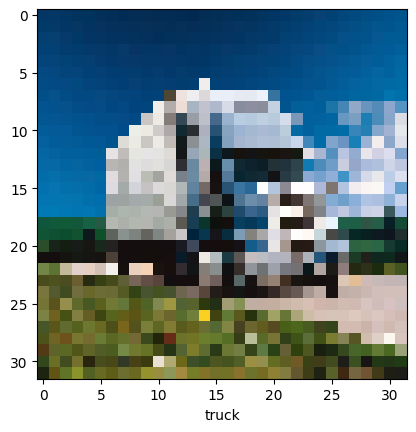

1/1 [==============================] - 0s 18ms/step


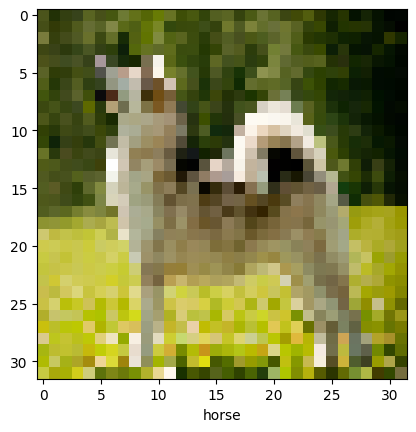

1/1 [==============================] - 0s 18ms/step


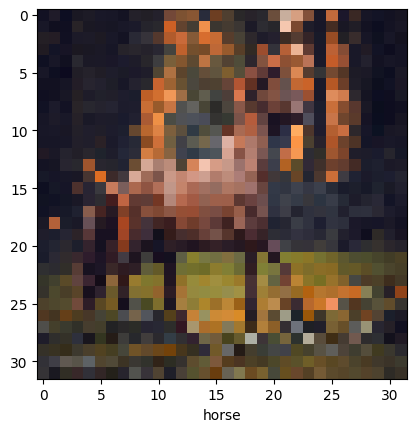

1/1 [==============================] - 0s 17ms/step


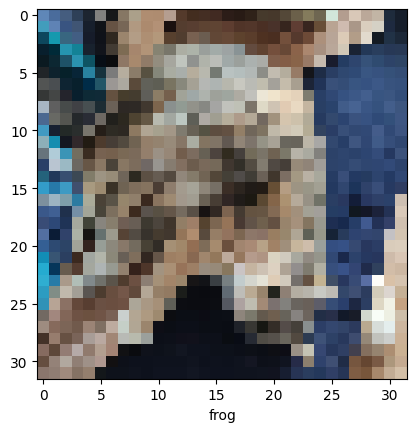

1/1 [==============================] - 0s 18ms/step


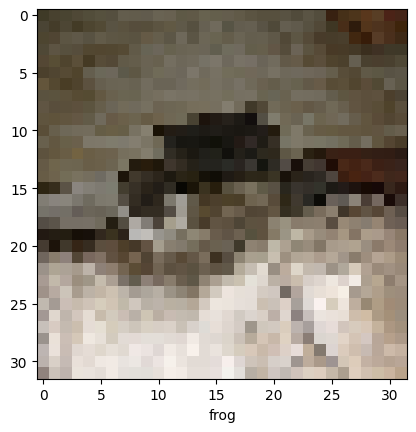

1/1 [==============================] - 0s 18ms/step


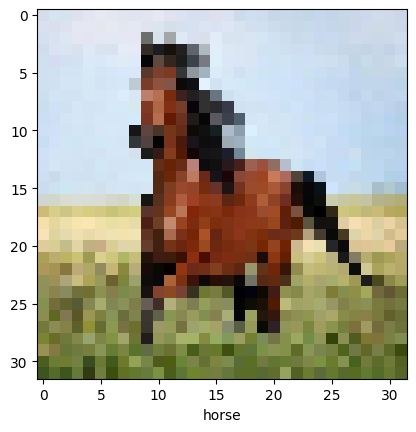

1/1 [==============================] - 0s 17ms/step


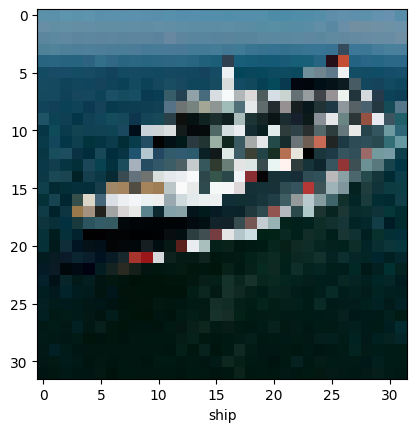

1/1 [==============================] - 0s 30ms/step


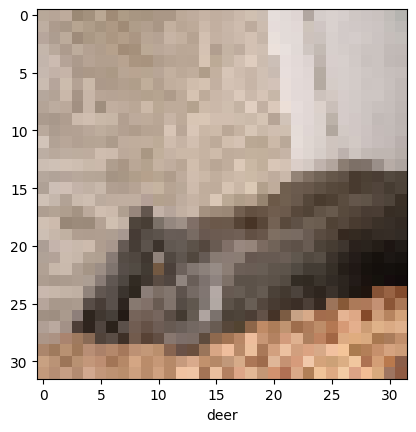

1/1 [==============================] - 0s 18ms/step


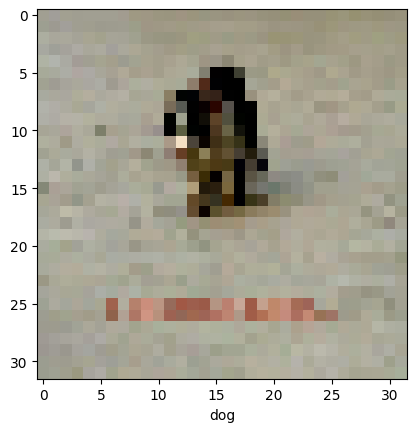

In [ ]:
images = load_images_from_folder('/content/drive/MyDrive/Учебная практика/images/')

# предсказание объектов при помощи модели из Google Диска
predict_many_objects(load_model_cnn3, classes, images)

In [ ]:
# вывод результатов оценки загруженной модели
print(f'\nevaluate: \n{load_model_cnn3.evaluate(x_test, y_test)}')

NameError: name 'x_test' is not defined

# Телеграм бот

In [ ]:
# установка aoigram
!pip install -U aiogram

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 13.2 MB/s eta 0:00:00


In [ ]:
import asyncio
import logging
import numpy as np
import tensorflow as tf
from aiogram import Bot, Dispatcher, types
from aiogram.filters.command import Command
from aiogram import F
import random

bot = Bot(token='6809929941:AAF4ERzSOEvlsVk6XLGgoxpoVBqJi1j5FYI')
dp = Dispatcher()
enum_classes = {
    'airplane': "самолёт",
    'automobile': "автомобиль",
    'bird': "птица",
    'cat': "кошка",
    'deer': "олень",
    'dog': "собака",
    'frog': "лягушка",
    'horse': "лошадь",
    'ship': "корабль",
    'truck': "грузовик",
}
stickers = [
    "CAACAgIAAxkBAAEFXi9mQXvIbZzUDBHmsW-vniC1AAEuKVQAAkkBAAJ7TioQ0orQ1emlfd81BA",
    "CAACAgIAAxkBAAEFXjFmQXvMEwfiJ3iZtCHsgFOZtLcwjgACUwEAAntOKhAfVB_05IFDCTUE",
    "CAACAgIAAxkBAAEFXjNmQXvPaWHiTkaoB_oYxCKiLEMuuQACUAEAAntOKhDc0KeEwC1AGTUE",
    "CAACAgIAAxkBAAEFXjVmQXvQM9bhokdAxjCACwAB9Z-O18EAAlEBAAJ7TioQN0D8Vj7jyKI1BA",
    "CAACAgIAAxkBAAEFXjdmQXvTEcieo9LhR-5tr6LSLy_SCAACfQEAAntOKhD9KtN2HPultDUE",
    "CAACAgIAAxkBAAEFXjlmQXvV2HCjdmwTPNxKuCCRFgE23gACewEAAntOKhCj7UGbbsk8uDUE",
    "CAACAgIAAxkBAAEFXjtmQXvWC66dj1M-NSH1Kgv_-0j0nQACcgEAAntOKhAoFXpdg5WfxzUE",
    "CAACAgIAAxkBAAEFXlNmQYZd0Eyf9TxVa0T8yqSmbEaEjwACbwEAAntOKhA_SGMJNXdipTUE",
    "CAACAgIAAxkBAAEFXlVmQYZgb_HWUncDi38Lb4B6mEzeDwACYAEAAntOKhCBfNndRmRpczUE"
]
@dp.message(Command('start'))
async def start_command(message: types.Message):
    first_name = message.from_user.first_name
    await message.answer(f'Привет, {first_name}!')
    await message.answer(f'Ожидаю изображение...')

@dp.message(F.photo)
async def get_photo_and_result(message: types.Message, bot: Bot):
    image_path = f'/content/drive/MyDrive/Учебная практика/temp_images/{message.photo[1].file_id}.jpg'
    await bot.download(
        message.photo[-1],
        destination=image_path
    )

    names = predict_object(load_model_cnn3, classes, load_single_image(image_path))
    await message.answer(f'Я думаю на фотографии {enum_classes[names]}')
    print(f'NAMES: {names}')
    sticker = random.choice(stickers)
    await bot.send_sticker(message.chat.id, sticker)
async def main():
    await dp.start_polling(bot)


if __name__ == '__main__':
    await main()

await main()

1/1 [==============================] - 0s 87ms/step
truck
NAMES: truck
1/1 [==============================] - 0s 17ms/step
deer
NAMES: deer
1/1 [==============================] - 0s 17ms/step
cat
NAMES: cat
1/1 [==============================] - 0s 17ms/step
airplane
NAMES: airplane
1/1 [==============================] - 0s 17ms/step
truck
NAMES: truck
1/1 [==============================] - 0s 18ms/step
dog
NAMES: dog


ERROR:aiogram.dispatcher:Failed to fetch updates - TelegramServerError: Telegram server says - Bad Gateway
ERROR:aiogram.dispatcher:Failed to fetch updates - TelegramServerError: Telegram server says - Bad Gateway
